In [1]:
import os  
import tensorflow as tf 
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np
from numpy import random

def feature_map_np(X):
    pol_X = []
    for j in xrange(len(X)):
        X_lst = []
        for i in range(1, degree + 1):
            X_lst.append(X[j][0] ** i)
        pol_X.append(X_lst)
    return pol_X

In [ ]:
'''
Submitted by - Pakhi Agarwal

IST 597: Foundations of Deep Learning
Problem 2: Polynomial Regression & 

@author - Alexander G. Ororbia II and Ankur Mali

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>.
'''



In [2]:
# NOTE: you will need to tinker with the meta-parameters below yourself (do not think of them as defaults by any means)
# meta-parameters for program
trial_name = 'p1_fit' # will add a unique sub-string to output of this program
degree = 15 # p, order of model
beta = 0.01 # regularization coefficient
alpha = 1.56 # step size coefficient
eps = 0.00001 # controls convergence criterion
n_epoch = 1100 # number of epochs (full passes through the dataset)

#n_epoch = 10000 # number of epochs (full passes through the dataset)

# begin simulation


In [3]:
def regress(X, theta):
    # WRITEME: write your code here to complete the routine
    
    X = feature_map(X)
    b,w = theta
    
    z = b + tf.matmul(X, w) 
    
    return z


In [4]:
def gaussian_log_likelihood(mu, y):
    # WRITEME: write your code here to complete the routine
    gauss = tf.reduce_sum(tf.pow(mu - y,2))
    return -0.5 * gauss
    


In [5]:
def computeCost(X, y, theta, beta): # loss is now Bernoulli cross-entropy/log likelihood
    # WRITEME: write your code here to complete the routine
    l = len(X)
    _,w = theta
    p = regress(X,theta)
    t = p-y
    b = t**2
    k = (tf.reduce_sum (w**2))
    a = (tf.reduce_sum(b)/(2*l)) + (beta * k)/(2*l)
     
    return a

In [6]:
def computeGrad(X, y, theta, beta):
    # WRITEME: write your code here to complete the routine (
    # NOTE: you do not have to use the partial derivative symbols below, they are there to guide your thinking)
    _,w = theta
    l = len(X)  
    p= regress(X,theta)
    t = p-y
    
    dL_dfy = None # derivative w.r.t. to model output units (fy)
    dL_db = (tf.reduce_sum(t))/l # derivative w.r.t. model weights w
    
    dL_dw = tf.transpose(tf.matmul(tf.transpose(t),feature_map(X)))/ l + ((w*beta)/l) # derivative w.r.t model bias b
    nabla = (dL_db, dL_dw) # nabla represents the full gradient
    return nabla

In [7]:
path = os.getcwd() + '/prob2.dat'  
data = pd.read_csv(path, header=None, names=['X', 'Y']) 

In [8]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X0 = data.iloc[:,0:cols-1]  
y0 = data.iloc[:,cols-1:cols] 

In [9]:
# convert from data frames to numpy matrices
X = np.array(X0.values)
y = np.array(y0.values)

#TODO convert np array to tensor objects
#TODO create an placeholder variable for X(input) and Y(output)

x_tensor = tf.placeholder(dtype=tf.float32, shape=(None,X.shape[1]))
y_tensor = tf.placeholder(dtype=tf.float32, shape=(None, y.shape[1]))


# apply feature map to input features x1

random.seed(1611189)
w0 = random.rand(degree,1)
b0 = random.rand(1, 1)

#w = tf.constant(w0, dtype=tf.float64)
#b = tf.constant(b0, dtype=tf.float64)

# WRITEME: write code to turn X_feat into a polynomial feature map (hint: you could use a loop and array concatenation)

#########################################################
def feature_map(X):
    pol_X = []
    for j in xrange(len(X)):
        X_lst = []
        for i in range(1, degree + 1):
            X_lst.append(X[j][0] ** i)
        pol_X.append(X_lst)
    return tf.convert_to_tensor(pol_X)
#######################################################

# convert to numpy arrays and initalize the parameter array theta 

######################################
w = tf.constant(w0, shape = (degree, 1), dtype=tf.float32, name= "Weights")
b = tf.constant(b0, shape = (1, 1), dtype=tf.float32, name= "Bias")
theta = (b,w)
#####################################

#create tensorflow variables w,b and theta as soon above



0
 0 L = 0.726690292358
 1 L = 0.556474983692
 2 L = 0.455118149519
 3 L = 0.385104626417
 4 L = 0.334817677736
 5 L = 0.2978323102
 6 L = 0.270174622536
 7 L = 0.249220624566
 8 L = 0.233157515526
 9 L = 0.220695868134
 10 L = 0.210901975632
 11 L = 0.203092724085
 12 L = 0.196765169501
 13 L = 0.191547736526
 14 L = 0.18716531992
 15 L = 0.183413848281
 16 L = 0.180141896009
 17 L = 0.177236810327
 18 L = 0.174614906311
 19 L = 0.172213688493
 20 L = 0.169986620545
 21 L = 0.167898863554
 22 L = 0.165924310684
 23 L = 0.164043307304
 24 L = 0.16224104166
 25 L = 0.160506278276
 26 L = 0.158830374479
 27 L = 0.157206758857
 28 L = 0.155630275607
 29 L = 0.154096871614
 30 L = 0.152603387833
 31 L = 0.151147201657
 32 L = 0.149726197124
 33 L = 0.148338615894
 34 L = 0.146982997656
 35 L = 0.145657986403
 36 L = 0.144362479448
 37 L = 0.143095493317
 38 L = 0.141856074333
 39 L = 0.140643432736
 40 L = 0.139456763864
 41 L = 0.13829536736
 42 L = 0.137158557773
 43 L = 0.13604567945
 4

 338 L = 0.0734357535839
 339 L = 0.0733958482742
 340 L = 0.0733560323715
 341 L = 0.0733163356781
 342 L = 0.0732767507434
 343 L = 0.0732372626662
 344 L = 0.0731978714466
 345 L = 0.0731585919857
 346 L = 0.0731194168329
 347 L = 0.0730803310871
 348 L = 0.0730413571
 349 L = 0.073002487421
 350 L = 0.0729636996984
 351 L = 0.072925016284
 352 L = 0.0728864371777
 353 L = 0.0728479400277
 354 L = 0.0728095620871
 355 L = 0.0727712512016
 356 L = 0.0727330520749
 357 L = 0.0726949349046
 358 L = 0.0726569220424
 359 L = 0.0726189911366
 360 L = 0.0725811645389
 361 L = 0.0725434273481
 362 L = 0.0725057646632
 363 L = 0.0724682062864
 364 L = 0.072430729866
 365 L = 0.0723933503032
 366 L = 0.0723560601473
 367 L = 0.0723188370466
 368 L = 0.0722817033529
 369 L = 0.0722446888685
 370 L = 0.0722077190876
 371 L = 0.0721708536148
 372 L = 0.0721340551972
 373 L = 0.0720973461866
 374 L = 0.0720607414842
 375 L = 0.0720241963863
 376 L = 0.0719877406955
 377 L = 0.0719513744116
 378 L

 668 L = 0.0638027191162
 669 L = 0.0637811720371
 670 L = 0.0637596547604
 671 L = 0.0637381672859
 672 L = 0.063716724515
 673 L = 0.0636953040957
 674 L = 0.0636739432812
 675 L = 0.0636525973678
 676 L = 0.0636312887073
 677 L = 0.0636100172997
 678 L = 0.063588783145
 679 L = 0.0635675787926
 680 L = 0.0635464116931
 681 L = 0.0635252818465
 682 L = 0.063504204154
 683 L = 0.0634831264615
 684 L = 0.0634621009231
 685 L = 0.0634411126375
 686 L = 0.0634201467037
 687 L = 0.0633992254734
 688 L = 0.063378341496
 689 L = 0.0633574798703
 690 L = 0.0633366629481
 691 L = 0.0633158683777
 692 L = 0.0632951334119
 693 L = 0.0632744058967
 694 L = 0.0632537305355
 695 L = 0.0632330700755
 696 L = 0.0632124468684
 697 L = 0.063191883266
 698 L = 0.0631713271141
 699 L = 0.0631508156657
 700 L = 0.0631303340197
 701 L = 0.0631098747253
 702 L = 0.0630894601345
 703 L = 0.0630690902472
 704 L = 0.0630487427115
 705 L = 0.0630284175277
 706 L = 0.0630081370473
 707 L = 0.062987908721
 708 L

 998 L = 0.0582892596722
 999 L = 0.058276578784
 1000 L = 0.0582639053464
 1001 L = 0.0582512617111
 1002 L = 0.0582386367023
 1003 L = 0.0582260414958
 1004 L = 0.0582134537399
 1005 L = 0.0582008883357
 1006 L = 0.058188341558
 1007 L = 0.0581758134067
 1008 L = 0.0581633076072
 1009 L = 0.0581508204341
 1010 L = 0.0581383630633
 1011 L = 0.0581259094179
 1012 L = 0.0581134855747
 1013 L = 0.0581010729074
 1014 L = 0.0580886751413
 1015 L = 0.0580763109028
 1016 L = 0.0580639690161
 1017 L = 0.0580516308546
 1018 L = 0.0580393224955
 1019 L = 0.0580270364881
 1020 L = 0.0580147579312
 1021 L = 0.0580025017262
 1022 L = 0.0579902678728
 1023 L = 0.0579780600965
 1024 L = 0.0579658672214
 1025 L = 0.0579536929727
 1026 L = 0.0579415149987
 1027 L = 0.0579293966293
 1028 L = 0.0579172745347
 1029 L = 0.0579051673412
 1030 L = 0.0578930899501
 1031 L = 0.0578810423613
 1032 L = 0.0578689873219
 1033 L = 0.0578569620848
 1034 L = 0.0578449480236
 1035 L = 0.0578329712152
 1036 L = 0.0578

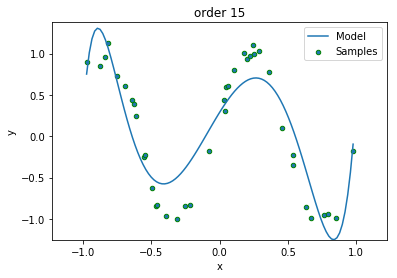

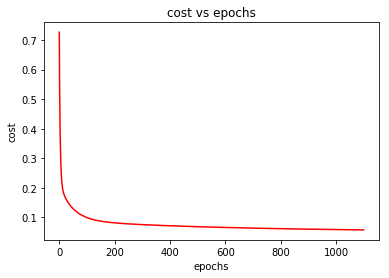

In [10]:
i = 0
halt = 0
cost = []
print i
with tf.Session() as sess:
    while i < n_epoch and halt == 0:
        #use feeddict to pass variables
        
        dL_db0, dL_dw0 = computeGrad(X, y, theta, beta)
        
        dL_db = dL_db0.eval()
        dL_dw = dL_dw0.eval()
                
        b = theta[0]
        w = theta[1]
        
        
        # update rules go here...
        # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
       ##################################### 
        b = b - alpha * dL_db
        
        
        w = w - alpha * dL_dw
        theta = (b, w)
        ####################################
        L0 = computeCost(X, y, theta, beta)
        L = L0.eval()
        # WRITEME: write code to perform a check for convergence (or simply to halt early)
        
        #############################
        if cost and cost[- 1] - L < eps:
            break
        cost.append(L)
        ############################
        
        print(" {0} L = {1}".format(i,L))
        i += 1
    # print parameter values found after the search
    #TODO
    
    w = w.eval()
    b = b.eval()
    
print("w = ",w)
print("b = ",b)

#Save everything into saver object in tensorflow
#Visualize using tensorboard

kludge = 0.25
# visualize the fit against the data
X_test = np.linspace(data.X.min(), data.X.max(), 100)
X_feat = np.expand_dims(X_test, axis=1) # we need this otherwise, the dimension is missing (turns shape(value,) to shape(value,value))


# apply feature map to input features x1
# WRITEME: write code to turn X_feat into a polynomial feature map (hint: you could use a loop and array concatenation)

plt.figure()
X_feat = feature_map_np(X_feat)

w = w.astype(float)
b = b.astype(float)

ttt = b + np.matmul(X_feat, w)
    
X_test0 = X_test
    
plt.plot(X_test0, ttt, label="Model")

plt.scatter(X[:,0], y, edgecolor='g', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.title("order 15")
plt.xlim((np.amin(X_test) - kludge, np.amax(X_test) + kludge))
plt.ylim((np.amin(y) - kludge, np.amax(y) + kludge))
plt.legend(loc="best")
plt.savefig(os.getcwd() + '/DLAssign1Problem2/ Order 15')

# WRITEME: write your code here to save plot to disk (look up documentation/inter-webs for matplotlib)
#########################################################################################
plt.show()

plt.figure()
plt.plot(cost, 'r')

plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("cost vs epochs")
plt.savefig(os.getcwd() + '/DLAssign1Problem2/ cost vs epoch')

#########################################################################################
plt.show()
